# Банки — Анализ оттока клиентов

Презентация

Ссылка на презетацию: https://disk.yandex.ru/i/hOHMLbEzce6r1A
# Описание проекта


# Цель проекта: 
проанализировать клиентов регионального банка «Метанпром» и выделить портрет клиентов, которые склонны попадать в отток.

# Задачи:

- Загрузка данных
  - 1.1 Импорт библиотек, загрузка и ознакомление с данными;
  - Вывод (Ознакомление с данными)
- Предобработка данных
  - 2.1 Проверка корректности и переименование колонок;
  - 2.2 Исследование и удаление дубликатов;
  - 2.3 Анализ природы пропусков и их разумная обработка;
  - 2.4 Кодирование;
  - Вывод (Предобработка данных)
- Исследовательский анализ данных (EDA)
  - 3.1 Анализ распределения признаков, в двух группах — тех, кто ушел в отток и тех, кто остался (непрерывные - ищем отточные интервалы, категориальные/дискретные - ищем значения признака с оттоком выше, чем по банку);
  - 3.2 Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл  и тех, кто остался;
  - 3.3 Анализ портретов клиентов в разрезе оттока;
  - 3.4 Корреляционный анализ;
  - Вывод (Исследовательский анализ данных)
- Проверка статистических гипотез
  - 4.1. Различия дохода между ушедшими и оставшимися клиентами.
  - вывод (гипотезы)
  - 4.2 Средний кредитный рейтинг у ушедших и оставшихся клиентов.
  - вывод (гипотезы)
- Подведение промежуточных итогов 
  - выводы по результатам EDA, корреляционного анализа и гипотез, выделение признаков, влияющих на оттток.
- Сегментация пользователей по потреблению.
  - Проанализиуем факторы, влияющие на отток пользователей: зависит ли отток от пола, возраста, города проживания, дохода, кол-ва обьектов недвижимости в собственности;
- Вывод 
- Приоритизация сегментов
- Формирование рекомендаций

# Описание данных

Заказчик подготовил для нас файл, который содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Набор данных включает следующие поля:

- Userid — идентификатор пользователя;
- Score — баллы кредитного скоринга;
- City — город;
- Gender — пол;
- Age — возраст;
- Equity - колличество баллов собственности;
- Balance — баланс на счете;
- Products — количество продуктов, которыми пользуется клиент;
- Credit_Card — есть ли кредитная карта;
- Loyalty — активный клиент;
- Est_salary — заработная плата клиента;
- Churn — ушел или нет.

## Шаг. Загрузка данных
### Импорт библиотек, загрузка и ознакомление с данными;

In [1]:
# импортируем необходимые для работы библиотеки:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import itertools
import statistics as sta
from statsmodels.stats.proportion import proportions_ztest
import warnings 
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('bank_scrooge.csv')
    print('не сработал')

Ознакомимся с данными

In [3]:
# выведем первые 5 строк
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.shape

(10000, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Вывод (Ознакомление с данными)

- Данные корректны у нас 10 000 сторк и 12 столбцов 
- Проверим данные на пропуски. Видим уже на данном этапе пропуски по балансу
- так же видим не корректно записанные название колонок, приведем к нижнему регистру и добавим змеиный регистр
- Проверим на данные дубликаты
- Типы данных надо поправить

## Шаг. Предобработка данных
### Проверка корректности и переименование колонок;

Приведем названия столбцов к нижнему регистру. Также добавим "змеиный регистр" для столбца USERID и EST_SALARY.

In [6]:
data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [7]:
# меняем тип данных в столбце
data['score'] = data['score'].astype('int')

посмотрим на корректность данных

In [8]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


При ознакомлении с таблицей внимание привлекает минимальное значение в столбце products - 0. Если человек является клиентом банка, то значит он пользуется как минимум одним продуктом. Возможно это человеческий фактор или технический.

посмотрим на клиента

In [9]:
# Взглянем на эту строку
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


И так у клиента неизвестен баланс, нету продуктов т.е нет кредитной карты и он не активен. теперь он действительно не пользуется банковскими продуктами. Для нашего анализа нужны клиенты которые продолжают пользоватся продуктами.

удалить данного клиента.

In [10]:
data = data[data['products']!=0]

In [11]:
print('Минимальный рейтинг кредитного скоринга:', data['score'].min())
print('Максимальный рейтинг кредитного скоринга:', data['score'].max())

Минимальный рейтинг кредитного скоринга: 642
Максимальный рейтинг кредитного скоринга: 1000


In [12]:
# проверим уникальные значения в столбце city
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [13]:
# проверим уникальные значения в столбце gender:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [14]:
print('Самый молодой клиент:', data['age'].min())
print('Самый старый клиент:', data['age'].max())

Самый молодой клиент: 18.0
Самый старый клиент: 86.0


In [15]:
# проверим уникальные значения в столбце equity:
data ['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

In [16]:
print('Минимальный рейтинг баланс:', data['balance'].min())
print('Максимальный рейтинг баланс:', data['balance'].max())

Минимальный рейтинг баланс: 0.0
Максимальный рейтинг баланс: 119113552.01


In [17]:
# проверим уникальные значения в столбце products:
data ['products'].unique()

array([2, 3, 1, 4, 5])

In [18]:
# проверим уникальные значения в столбце credit_card:
data ['credit_card'].unique()

array([0, 1])

In [19]:
# проверим уникальные значения в столбце last_activity:
data ['last_activity'].unique()

array([1, 0])

In [20]:
print('Самая маленькая зарплата клиента:', data['est_salary'].min())
print('Самая большая зарплата:', data['est_salary'].max())

Самая маленькая зарплата клиента: 2546.3
Самая большая зарплата: 1395064.45


Минимальная заработная плата выглядит слишком низкой - 2546.3 руб. Первое, что приходит на ум - это то, что произошел сбой при выгрузке данных 

Минимальная зарплата в России в 2023 году - 16 242 рубля, но бывает такое, когда человек получает пенсию по инвалидности (она очень часто меньше МРОТ. Бывает, что и намногo или работает на 1/4 ставки по сдельной оплате и получает меньше минималки.

Так же возможен вариант, что данные не предоставили и значения были получены при расчетах специальной моделью. 

In [21]:
# Посмотрим сколько таких клиентов у кого зп меньше мрота 
data_salary = data[data['est_salary'] < 16242]
len(data_salary)

80

Их не много на иследование сильно не повлияют

In [22]:
# проверим уникальные значения в столбце churn:
data ['churn'].unique()

array([1, 0])

Итог данные корректны, у нас хороший кредитный скоринг, работаем по трем городам, у нас только два пола, все наши клиенты совершенно летние, баллы за собественность 10 максимальный, видим что балансы очень разнятся! Всего у банка 6 продуктов для клиента, крединтые каты (да/нет), активность клиентов (да/нет). и видим что зарплта очень разнится.

### Исследование и удаление дубликатов;
Посмотрим на дубликаты в данных

In [23]:
#Посчитаем дубликаты всего по строкам и только в столбце id
print('Количество дубликатов в датасете - ', data.duplicated().sum())
print('Количество дупликатов по столбцу user_id - ', data['user_id'].duplicated().sum())

Количество дубликатов в датасете -  0
Количество дупликатов по столбцу user_id -  73


In [24]:
# найдем процент дубликатов в столбце 'user_id'
data['user_id'].duplicated().sum()/len(data)*100

0.7300730073007301

Обнаружилось, что в датафрейме 73 дубликата в столбце user_id. 

Посмотрим что это за дубликаты.

In [25]:
data[data.duplicated('user_id', keep='first')]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


Проверим совпадает ли между дубликатами по user_id ещё такие надёжные для идентификации пользователей поля как пол и возраст.

In [26]:
data.duplicated(['user_id','gender', 'age']).sum()

2

In [27]:
data[data.duplicated(['user_id','gender', 'age'], False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1
5197,155765,923,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
8205,227795,840,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


Нельзя утвержать что это дубликаты пользователей, есть разница по остальным полям. Bо всех дубликатах по user_id данные отличаются.Удалять эти дубликаты нельзя, они хранять разную информацию о клиентах, возможно это был сбой в системе банка.

По остальным данным нет дубликотв.

Т.к. поле user_id нам не требуется, для анализа данных, то его можно оставить как есть.

In [28]:
# проверим корректность данных в столбцах с количественными характеристиками
data[['score','age','equity','balance','products','est_salary']].describe().applymap('{:,.2f}'.format)

,score,age,equity,balance,products,est_salary
count,"9,999.00","9,973.00","9,999.00","7,705.00","9,999.00","9,999.00"
mean,848.69,42.73,2.63,"827,794.31",1.87,"147,879.17"
std,65.44,12.18,1.98,"1,980,614.15",0.79,"139,390.07"
min,642.00,18.00,0.00,0.00,1.00,"2,546.30"
25%,802.00,33.00,0.00,"295,554.16",1.00,"75,252.12"
50%,853.00,40.00,3.00,"524,272.20",2.00,"119,661.51"
75%,900.00,51.00,4.00,"980,705.85",2.00,"174,501.12"
max,"1,000.00",86.00,9.00,"119,113,552.01",5.00,"1,395,064.45"


### Анализ природы пропусков и их разумная обработка;

In [29]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропуски обнаружились в двух столбцах, однако в столбце balance их достаточно много (более 20%), поэтому удалять их было бы некорректно. Можно заменить средним или медианой, однако это может повлиять на результаты дальнейшего анализа, поэтому попробуем исследовать природу этих пропусков. Так же посмотри что за пропусуки в возрасте клиентов, изучим их.

In [30]:
# найдем процент пропуска в столбце 'balance'
data['balance'].isna().sum()/len(data)*100

22.94229422942294

Почти 23% эти данные нельзя удалять.

In [31]:
# посмотрим средние значения столбцов в датасете с пропусками 'balance' и без

blalance_1 = data[data['balance'].notna()].mean(numeric_only=True)
blalance_0 = data[data['balance'].isna()].mean(numeric_only=True)

pd.concat({'Баланс_среднее': blalance_1,
           'Нет_баланса_среднее': blalance_0,
           "%": (blalance_0/blalance_1-1)*100},axis=1)

,Баланс_среднее,Нет_баланса_среднее,%
user_id,171738.837508,172080.011334,0.198659
score,843.739260,865.309939,2.556557
age,42.924366,42.076822,-1.974507
equity,3.395068,0.049695,-98.536263
balance,827794.306510,NaN,NaN
products,2.080986,1.162598,-44.132355
credit_card,0.640104,0.816042,27.485856
last_activity,0.515769,0.549695,6.577727
est_salary,124501.872366,226397.935876,81.842997
churn,0.234523,0.005231,-97.769500


Средние значения по столбцам equity, products, churn, est_salary значительно отличаются. Значит эти пропуски нельзя обьяснить случайным техническим сбоем. Обратим внимание ещё раз на столбец est_salary и наблюдаем что она самая высокая. Скорее всего предположим, что эти клиенты недавно сняли с баланса денежные суммы

Создадим новую характеристику клиента balance_nan - отсутствие баланса, чтобы можно было проанализировать характер её связи с другими данными.

In [32]:
data['balance_nan']=data['balance']
data['balance_nan'] = data['balance_nan'].apply(lambda x: 1 if pd.isna(x) else 0)
data.sample(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
7702,181390,906,Ярославль,М,42.0,4,598094.17,4,1,1,196076.07,1,0
6080,163099,912,Ярославль,Ж,49.0,0,NaN,1,0,1,168675.69,0,1
3837,165185,848,Ярославль,Ж,32.0,3,2441321.45,4,0,1,279570.21,1,0
7993,118905,847,Рыбинск,Ж,60.0,2,1281503.77,3,1,0,51286.89,0,0
6093,202951,906,Ростов,М,32.0,0,NaN,1,1,0,148868.29,0,1


In [33]:
data.corrwith(data['balance_nan']).sort_values(key=abs).apply('{:.2f}'.format)

user_id           0.00
last_activity     0.03
age              -0.03
score             0.14
credit_card       0.16
churn            -0.25
est_salary        0.31
products         -0.49
equity           -0.71
balance_nan       1.00
balance            nan
dtype: object

На корреляции мы так же можем наблюдать высокое рассхождение с оценночным доходом, но пропуски не чем заменить, оставим их без изменений. Отенсем эти пропуски к тиму MNAR

MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Посмотрим на пропуски в возрасте

In [34]:
# найдем процент пропуска в столбце 'age'
data['age'].isna().sum()/len(data)*100

0.26002600260026004

Процент пропусков мал. Эти данные можно удалить.
Но для начала посмотрим на них


In [35]:
age_1 = data[data['age'].notna()].mean(numeric_only=True)
age_0 = data[data['age'].isna()].mean(numeric_only=True)

pd.concat({'Возраст_среднее': age_1,
           'Нет_возраста_среднее': age_0,
           "%": (age_0/age_1-1)*100},axis=1)

,Возраст_среднее,Нет_возраста_среднее,%
user_id,171757.616966,1.946375e+05,13.321030
score,848.671212,8.551538e+02,0.763857
age,42.730773,NaN,NaN
equity,2.630803,1.384615e+00,-47.369100
balance,827245.587515,1.250034e+06,51.107917
products,1.871653,1.346154e+00,-28.076758
credit_card,0.680237,7.692308e-01,13.082819
last_activity,0.522912,7.692308e-01,47.105244
est_salary,147799.115241,1.785852e+05,20.829681
churn,0.182292,3.846154e-02,-78.901159


In [36]:
data[data['age'].isna()].head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,0
2165,187635,692,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,1
2444,221156,913,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,0
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0


Данный тип пропусков можно отнести к типу MAR.

MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;

In [37]:
data = data.dropna(subset=['age'])

In [38]:
# изменим тип данных в столбце 'age' на int
data['age'] = data['age'].astype('int')
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0


###  Кодирование
для дальнейшего анализа нам необходимо будет кодировать некоторые столбцы, то есть перевести категориальные значения в бинарные.

In [39]:
# Gender приведем к булевым значениям, где 1 - будет мужчина
data['gender'] = (data['gender'] == 'М')*1
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0


In [40]:
# создадим копии столбца 'city' и закодируем
data['city_copy']=data['city']
data = pd.get_dummies(data, columns=['city_copy'])
data.rename(columns={"city_copy_Ростов": "rostov", "city_copy_Рыбинск": "rybinsk", "city_copy_Ярославль": "yaroslavl"}, inplace = True)
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,rostov,rybinsk,yaroslavl
0,183012,850,Рыбинск,0,25,1,59214.82,2,0,1,75719.14,1,0,0,1,0
1,146556,861,Рыбинск,0,37,5,850594.33,3,1,0,86621.77,0,0,0,1,0
2,120722,892,Рыбинск,0,30,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866,Ярославль,0,51,5,1524746.26,2,0,1,174423.53,1,0,0,0,1
4,157978,730,Ярославль,1,34,5,174.00,1,1,0,67353.16,1,0,0,0,1


Вывод:

Проведена предобработка данных:

- переименованы столбцы USERID и EST_SALARY;
- изменен тип данных в столбце age с float на int;
- полных дубликатов не обнаружено;
- проанализированы дубликаты дубликаты в столбце user_id;
- столбцах gender и city применена кодировка данных для удобства дальнейший расчетов;
- пропуски в столбце age были удалины, пропуски в столбце balance оставлены без изменений.

## Шаг. Исследовательский анализ данных (EDA)
### Анализ распределения признаков, в двух группах — тех, кто ушел в отток и тех, кто остался

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [41]:
data['churn'].value_counts(normalize = True).round(2).reset_index()

,index,churn
0,0,0.82
1,1,0.18


Будем иметь ввиду, что общей выборке присутствует только 18% класса 1 (churn)

Посмотрим на эти признаки.

Рассмотрим центральные тенденции характеристик в разрезе оттока.

- для категориальных и бинарных типов характеристик - среднее.
- для непрерывных типов характеристик - медианы.

In [42]:
data_churn = data.groupby('churn').agg({
                         'churn': 'count',
                         'equity': 'mean',
                         'products': 'mean', 
                         'credit_card': 'mean', 
                         'last_activity': 'mean', 
                         'rostov': 'mean', 
                         'rybinsk': 'mean', 
                         'yaroslavl': 'mean', 
                         'gender': 'mean', 
                         'score' : 'median', 
                         'age': 'median', 
                         'balance': 'median', 
                         'balance_nan': 'mean', 
                         'est_salary': 'median'}).rename(columns = {'churn':'count'})
display(data_churn)


,count,equity,products,credit_card,last_activity,rostov,rybinsk,yaroslavl,gender,score,age,balance,balance_nan,est_salary
churn,,,,,,,,,,,,,,
0,8155,2.378296,1.758921,0.708890,0.482894,0.141140,0.275414,0.583446,0.466953,848,40,475410.09,0.277866,118227.60
1,1818,3.763476,2.377338,0.551705,0.702420,0.145765,0.239824,0.614411,0.650715,866,39,783908.90,0.006601,125408.88


### Построим диаграммы распределения признаков для тех, кто ушёл и тех, кто остался;
Для количественных непрерывных характеристик построим график распределение в разрезе оттока.

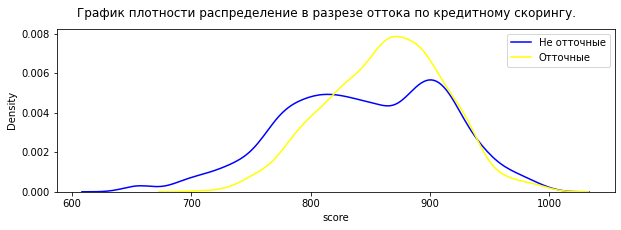

In [43]:
# визуализируем взаимосвязь оттока для score
plt.figure(figsize=(10,3))
sns.kdeplot(data[data['churn'] == 0]['score'], clip=(0.0, 2000000.0), common_norm=False, color='blue')
sns.kdeplot(data[data['churn'] == 1]['score'], clip=(0.0, 2000000.0), common_norm=False, color='yellow')
plt.legend(['Не отточные', 'Отточные'])
plt.suptitle("График плотности распределение в разрезе оттока по кредитному скорингу.")
plt.show();

Первое, что бросается в глаза - из банка уходили клиенты со скоринговым баллом от 800 до 905. Далее показатель уменьшается. Клиенты с хорошими баллами по кредиту уходят.

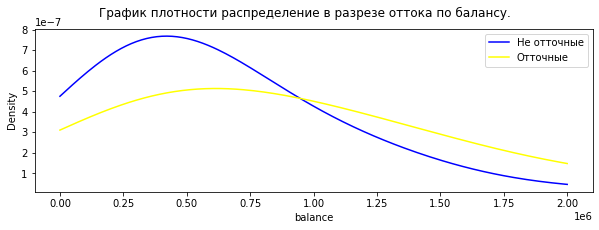

In [44]:
# визуализируем взаимосвязь оттока для balance
plt.figure(figsize=(10,3))
sns.kdeplot(data[data['churn'] == 0]['balance'], clip=(0.0, 2000000.0), common_norm=False, color='blue')
sns.kdeplot(data[data['churn'] == 1]['balance'], clip=(0.0, 2000000.0), common_norm=False, color='yellow')
plt.legend(['Не отточные', 'Отточные'])
plt.suptitle("График плотности распределение в разрезе оттока по балансу.")
plt.show();

Наблюдаем рост оттока от 250 000 до 900 000 далее показаеть идет на снижение.

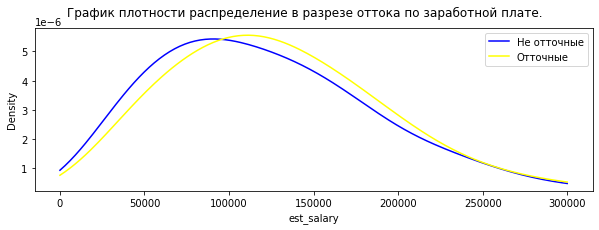

In [45]:
# визуализируем взаимосвязь оттока для est_salary
plt.figure(figsize=(10,3))
sns.kdeplot(data[data['churn'] == 0]['est_salary'], clip=(0.0, 300000.0), common_norm=False, color='Blue')
sns.kdeplot(data[data['churn'] == 1]['est_salary'], clip=(0.0, 300000.0), common_norm=False, color='Yellow')
plt.legend(['Не отточные', 'Отточные'])
plt.suptitle("График плотности распределение в разрезе оттока по заработной плате.")
plt.show();

Отток для оценночного дохода начинает рости от 100 000 до 200 000 

Для дискретных характеристик построим гистограмму в разрезе оттока

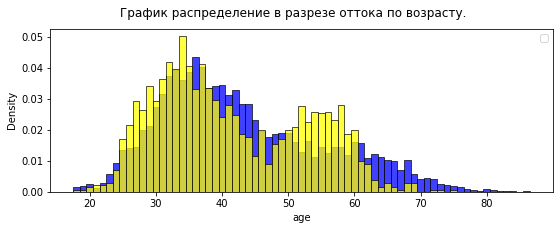

In [46]:
plt.figure(figsize=(9,3))
plt.legend(['Не отточные', 'Отточные'])
sns.histplot(data[data['churn'] == 0]['age'], discrete=True, stat='density', common_norm=False, color='Blue');
sns.histplot(data[data['churn'] == 1]['age'], discrete=True, stat='density', common_norm=False, color='Yellow');
plt.suptitle("График распределение в разрезе оттока по возрасту.")
plt.show()

Теперь мы можем выделить возрастные группы с пользователями, имеющим схожие паттерны оттока:

1. от 18 до 24 лет;
2. от 25 до 35 лет;
3. от 36 до 50 лет;
4. от 51 до 60 лет;
5. 61+ года и старше.

В отток попадают два интервала это с возрастом от 25 до 35 лет и с 51 до 60 лет 

In [47]:
# создадим функцию age_cat для распределения клиентов по возрастным группам

def age_group(age):
    if 18 <= age <= 24:
        return '18-24'
    if 25 <= age <= 35:
        return '25-35'
    if 36 <= age <= 50:
        return '36-50'
    if 51 <= age <= 60:
        return '51-60'
    if 61 <= age:
        return '60+'
    
data['age_group'] = data['age'].apply(age_group)

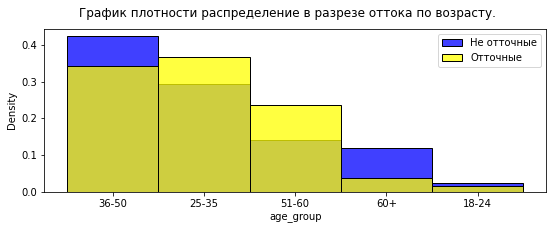

In [48]:
plt.figure(figsize=(9,3))
sns.histplot(data[data['churn'] == 0]['age_group'], discrete=True, stat='density', common_norm=False, color='Blue');
sns.histplot(data[data['churn'] == 1]['age_group'], discrete=True, stat='density', common_norm=False, color='Yellow');
plt.suptitle("График плотности распределение в разрезе оттока по возрасту.") 
plt.legend(['Не отточные', 'Отточные'])
plt.show();

Отточных груп две это с возрастом от 25 до 35 и от 51 до 60

Для категориальных характеристик построим столбчатую диаграмму уровня оттока

In [49]:
churn_mean=data['churn'].mean()
churn_mean

0.18229218891005716

,sum,count,%
city,,,
Ростов,265,1416,18.714689
Рыбинск,436,2682,16.256525
Ярославль,1117,5875,19.012766


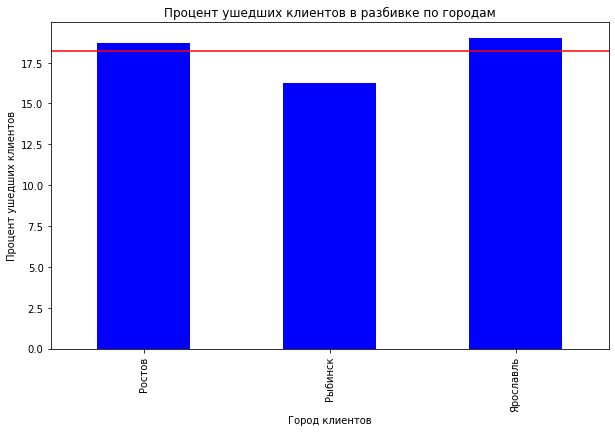

In [50]:
# Рассчитаем процент ушедших клиентов в разбивке по городам от общего числа:
city_churn = data.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['%'] = city_churn['sum']/city_churn['count']*100

# Построим столбчатую диаграмму:
city_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по городам',
    xlabel = 'Город клиентов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color = 'blue')
plt.axhline(y=churn_mean*100, color='red', linestyle='-');
city_churn

Процент распределения по городам не сильный, они почти равны

,sum,count,%
equity,,,
0,90,2576,3.493789
1,93,773,12.031048
2,166,1051,15.794481
3,321,1540,20.844156
4,464,1847,25.121819
5,576,1915,30.078329
6,58,161,36.024845
7,37,80,46.250000
8,6,17,35.294118


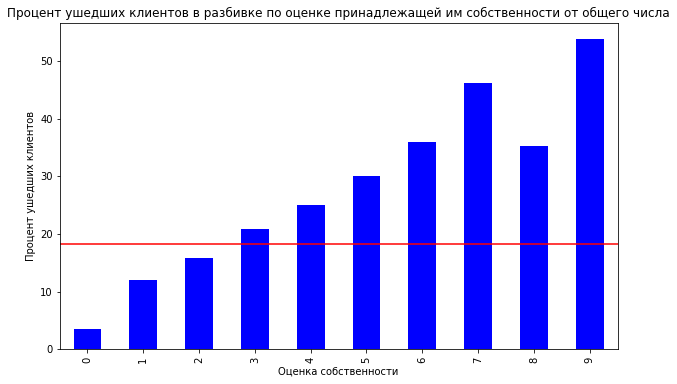

In [51]:
# процент ушедших клиентов в разбивке по оценке принадлежащей им собственности от общего числа:
equity_churn = data.pivot_table (index = 'equity', values = 'churn', aggfunc = ['sum', 'count'])
equity_churn.columns = equity_churn.columns.droplevel(level=1)
equity_churn ['%'] = equity_churn['sum']/equity_churn['count']*100

# Построим столбчатую диаграмму:
equity_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по оценке принадлежащей им собственности от общего числа',
    xlabel = 'Оценка собственности', ylabel = 'Процент ушедших клиентов', figsize = (10,6), color = 'blue')
plt.axhline(y=churn_mean*100, color='red', linestyle='-');
equity_churn

Мы видим практически прямую зависимость - чем выше оценка собственности, тем больше процент отточных клиентов (от 3,4% для оценки 0 до 53% для оценки 9).

,sum,count,%
products,,,
1,235,3323,7.071923
2,978,5119,19.105294
3,297,1038,28.612717
4,300,474,63.291139
5,8,19,42.105263


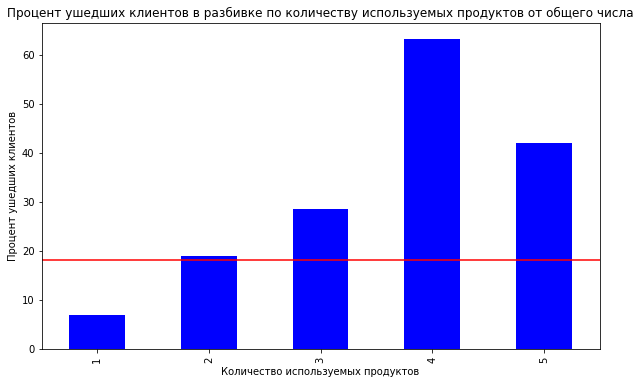

In [52]:
# Рассчитаем процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа:
products_churn = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['sum', 'count'])
products_churn.columns = products_churn.columns.droplevel(level=1)
products_churn ['%'] = products_churn['sum']/products_churn['count']*100

# Построим столбчатую диаграмму:
products_churn['%'].plot (
    kind='bar', title = 'Процент ушедших клиентов в разбивке по количеству используемых продуктов от общего числа',
    xlabel = 'Количество используемых продуктов', ylabel = 'Процент ушедших клиентов', figsize = (10,6), 
    color = 'blue')
plt.axhline(y=churn_mean*100, color='red', linestyle='-');
products_churn

Процент отточности увеличивается, когда клиент пользуется 2 и более продуктами 

,sum,count,%
gender,,,
0,635,4982,12.745885
1,1183,4991,23.702665


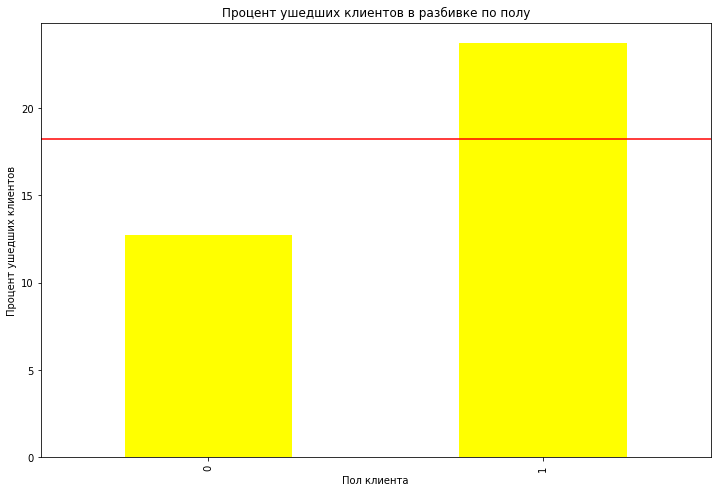

In [53]:
# Рассчитаем процент ушедших клиентов в разбивке по полу от общего числа:
gender_churn = data.pivot_table (index = 'gender', values = 'churn', aggfunc = ['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['%'] = gender_churn['sum']/gender_churn['count']*100

# Построим столбчатую диаграмму:
gender_churn['%'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по полу', figsize = (12,8), color = 'Yellow', 
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов')
plt.axhline(y=churn_mean*100, color='red', linestyle='-');
gender_churn

Мужчин уходит больше чем женщин почти на 50%

,sum,count,%
credit_card,,,
0,815,3189,25.556601
1,1003,6784,14.784788


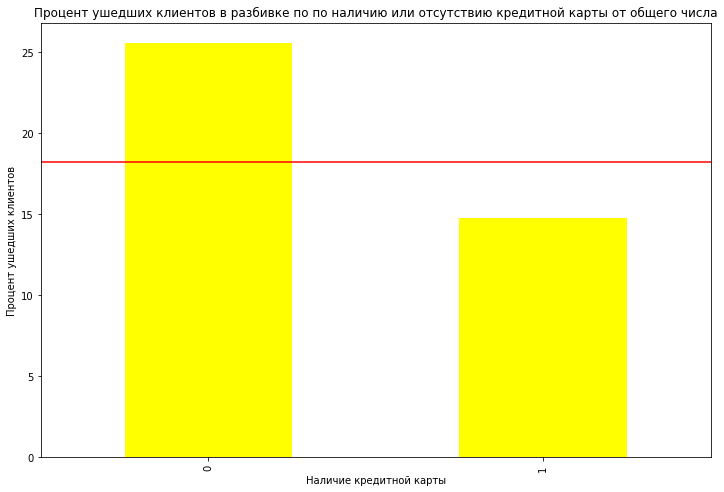

In [54]:
# Рассчитаем процент ушедших клиентов в разбивке по наличию или отсутствию кредитной карты:
credit_card_churn = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['sum', 'count'])
credit_card_churn.columns = credit_card_churn.columns.droplevel(level=1)
credit_card_churn ['%'] = credit_card_churn['sum']/credit_card_churn['count']*100

# Построим столбчатую диаграмму:
credit_card_churn['%'].plot(
    kind='bar', figsize = (12,8), color = 'Yellow', xlabel = 'Наличие кредитной карты',
    title = 'Процент ушедших клиентов в разбивке по по наличию или отсутствию кредитной карты от общего числа',
    ylabel = 'Процент ушедших клиентов')
plt.axhline(y=churn_mean*100, color='red', linestyle='-')
credit_card_churn

Наличие кредитной карты не является оттоком 

,sum,count,%
last_activity,,,
0,541,4758,11.370324
1,1277,5215,24.487057


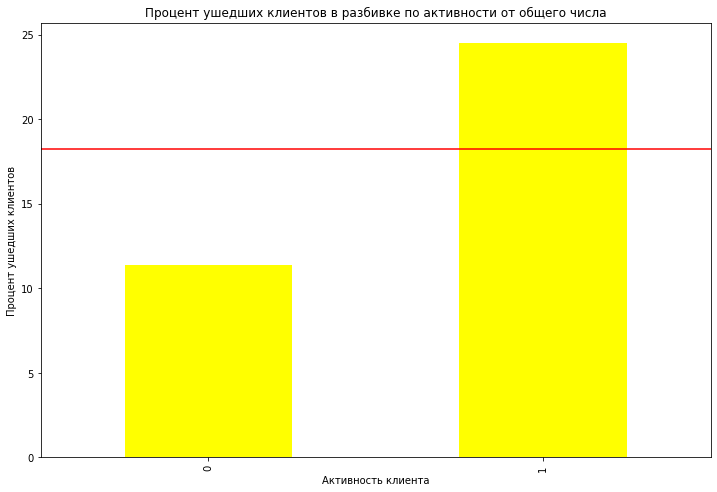

In [55]:
# Рассчитаем процент ушедших клиентов в разбивке по активности от общего числа:
last_activity_churn = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['sum', 'count'])
last_activity_churn.columns = last_activity_churn.columns.droplevel(level=1)
last_activity_churn ['%'] = last_activity_churn['sum']/last_activity_churn['count']*100

# Построим столбчатую диаграмму:
last_activity_churn['%'].plot(
    kind='bar', title = 'Процент ушедших клиентов в разбивке по активности от общего числа', figsize = (12,8), 
    color = 'Yellow', ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента')
plt.axhline(y=churn_mean*100, color='red', linestyle='-');
last_activity_churn

Активность клиентов влияет на отток, почти на 50%

###  Анализ портретов клиентов в разрезе оттока

Сравним центральные тенденции характеристик в разрезе отточных и неотточных.

- для категориальных и бинарных типов характеристик - среднее.
- для непрерывных типов характеристик - медианы.

In [56]:
data_churn = data.pivot_table(index='churn', aggfunc={
                         'equity': 'median',
                         'products': 'median', 
                         'credit_card': sta.mode, 
                         'last_activity': sta.mode,
                         'city': sta.mode,
                         'gender': sta.mode, 
                         'score' : 'mean', 
                         'age': 'mean', 
                         'balance': 'median', 
                         'est_salary': 'mean'})
data_churn.T

churn,0,1
age,43.020846,41.429593
balance,475410.09,783908.9
city,Ярославль,Ярославль
credit_card,1,1
equity,3,4
est_salary,147674.637881,148357.483157
gender,0,1
last_activity,0,1
products,2,2
score,845.396199,863.361936


In [57]:
# создадим отдельную таблицу для категориальных
data_churn_con = data_churn[['credit_card', 'last_activity', 'city','gender', 'equity', 'products']].T
# создадим таблицу для количественных и посчитаем относительную разницу
data_churn_cont = data_churn[['score','age', 'balance', 'est_salary']].T
data_churn_cont['%']=(((data_churn_cont[1] - data_churn_cont[0])/data_churn_cont[0])*100).round(2)

In [58]:
# обьединим две таблицы
df_concat = pd.concat([data_churn_con, data_churn_cont])
df_concat.columns = ['no_churn', 'churn', '%']
df_concat = df_concat.sort_values(by = '%', ascending = False)
df_concat['%'] = df_concat['%'].fillna('-')
df_concat

,no_churn,churn,%
balance,475410.09,783908.9,64.89
score,845.396199,863.361936,2.13
est_salary,147674.637881,148357.483157,0.46
age,43.020846,41.429593,-3.7
credit_card,1,1,-
last_activity,0,1,-
city,Ярославль,Ярославль,-
gender,0,1,-
equity,3,4,-
products,2,2,-


Получившиеся группы достаточного размера, чтобы можно было воспользоваться стат. методами для их сравнения.

- Между средними отточными и неотточными клиентами есть сильная разница по столбцу: balance
- Столбцы где разница в отточности маленькая или нету: est_salary и score, age
- По категориальным взята мода: credit_card - наличе не вляет, last_activity - активные, city - у оттока и не оттока Ярославль,	gender - мужины, equity- 4 собственности, products - у оттока и не оттока по 2 продукта


Портрет клиента

Факторы влияющие на отток клиента

- баллы кредитного рейтинга score от 800 до 905
- баланс balance от 250 000 до 900 000
- оценочный доход клиента est_salary от 100 000 до 200 000
- возраст age от 25 до 35 или от 50 до 60
- баллов собственности equity начиная от 3 и выше
- продуктов products от 2 и выше
- пол gender мужчина
- кредитной карты credit_card отсутсвие карты у клиента
- активен last_activity больше активынх 

### Корреляционный анализ;

In [59]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,9973.0,171757.616966,3.369637e+04,94561.0,142757.000,172651.00,201164.000,2.291450e+05
score,9973.0,848.671212,6.539315e+01,642.0,802.000,853.00,900.000,1.000000e+03
gender,9973.0,0.500451,5.000249e-01,0.0,0.000,1.00,1.000,1.000000e+00
age,9973.0,42.730773,1.217517e+01,18.0,33.000,40.00,51.000,8.600000e+01
equity,9973.0,2.630803,1.980060e+00,0.0,0.000,3.00,4.000,9.000000e+00
balance,7695.0,827245.587515,1.980327e+06,0.0,295698.715,524295.33,980051.215,1.191136e+08
products,9973.0,1.871653,7.925468e-01,1.0,1.000,2.00,2.000,5.000000e+00
credit_card,9973.0,0.680237,4.664082e-01,0.0,0.000,1.00,1.000,1.000000e+00
last_activity,9973.0,0.522912,4.994998e-01,0.0,0.000,1.00,1.000,1.000000e+00
est_salary,9973.0,147799.115241,1.392871e+05,2546.3,75252.020,119643.06,174499.960,1.395064e+06


- В данной выборке у нас все клиенты уникальные и их 9973 человек (их стало меньше в следствии что мы удалили, клиента который не пользовался ни одним продуктом банка и неизвестные с возрастом)
- Средний балл кредитного скоринга равен 848 (score). Это отличный балл, он позволяет оформить займ со стандартными условиями, хотя.
- Половина клиентов у нас из Ярославля, остальные - из Рыбинска и Ростова.
- Почти одинаковое распределение по полу, хотя мужчин немного больше - их 52% от всей выборки.
- Клиентам от 18 до 86 лет, при этом средний возраст - 42 лет (age).
- Среднее количество объектов в собственности у клиентов - 2-3. 
- Средняя сумма на счете равна 827 794 рублей. Есть клиенты у которых на балансе более 1 000 000.
- В среднем клиенты пользуются - 1-2 продуктами (products).
- В среднем клиенты имеют кредитную карту - 68% (credit_сard).
- 52% клиентов активны, то есть пользовались нашими продуктами в последнее время (last_activity).
- Заработная плата в среднем 140 000 рублей. Это довольно неплохо, учитывая, что наш банк расположен не в самых крупных по населению городах. 
- Доля оттока 18%. Значит в нашей выборке 18% клиентов ушли.

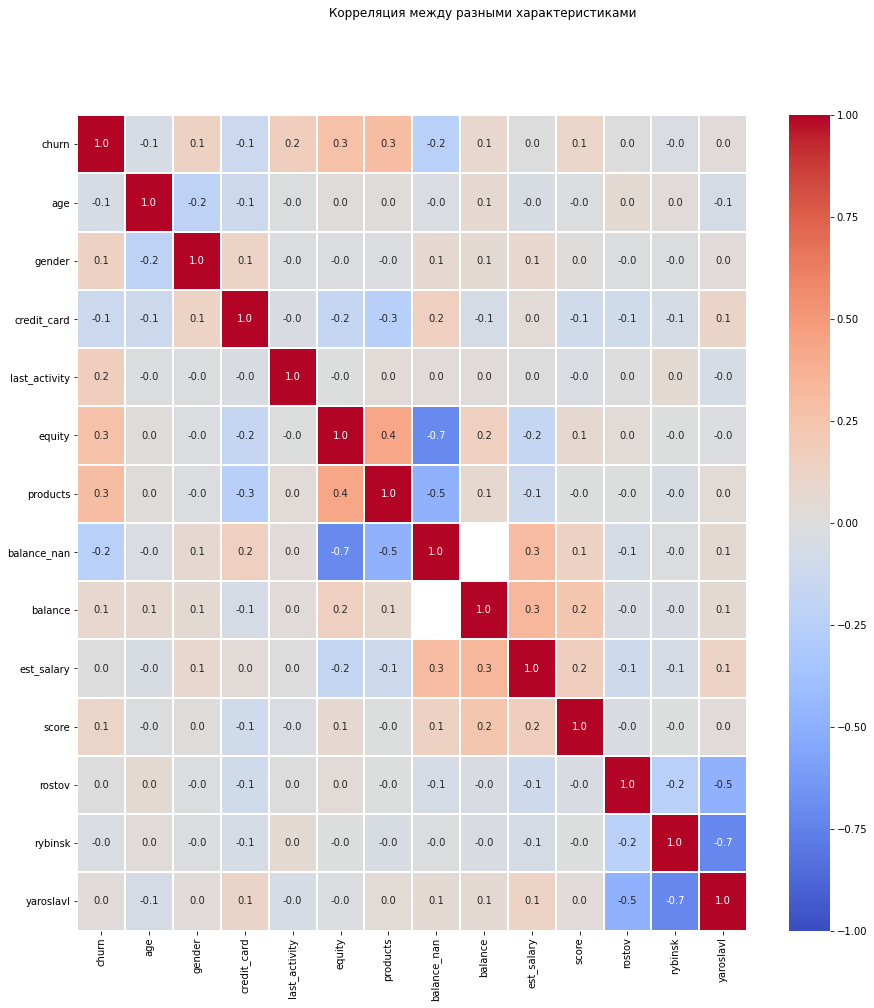

In [60]:
correlation = data[['churn',
                  'age',
                  'gender',
                  'credit_card',
                  'last_activity',
                  'equity',
                  'products',
                  'balance_nan',
                  'balance',
                  'est_salary',
                  'score',
                  'rostov',
                  'rybinsk',
                  'yaroslavl'  
                 ]].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', fmt=".1f", linewidths=1)
plt.suptitle('Корреляция между разными характеристиками')
plt.show()

По таблице видно, что наибольшая корреляция с показателем оттока клиентов у таких параметров как:

- оценка объектов собственности клиента (столбец equity),
- скоринговый рейтинг клиента (столбец score),
- количество продуктов, которыми пользуется клиент (столбец products),
- наличие кредитной карты (столбец credit_card),
- активность пользователя (столбец last_activity),
- пол пользователя (столбец gender),
- возраст пользвателя (столбец age)

По шкале Чеддока взяли по 10%, корреляцию оттока с характеристиками можно оценить как:
- нету: age(-0.1), credit_card(-0.1), est_salary(0),
- слабая: gender(0.1), balance_na, balance(0.1), score(0.1). 
- умеренная: last_activity(0.2), equity(0.3), products(0.3).

Следовательно, у нас нет какого-то очевидного признака, по которому мы могли бы явно выявить склонность клиентов к оттоку. При этом сильно коррелирующих признаков между собой нет. 

Выводы по иследованию EDA:

Посмотрели что в выборке у нас 18% оттока. Изучили графики распределения выделили среднее значения для каждой выборки, составили протрет клиентов склонных к оттоку. и выявили факторы которые на это влияют.

- баллы кредитного рейтинга score от 800 до 905
- баланс balance от 250 000 до 900 000
- оценочный доход клиента est_salary от 100 000 до 200 000
- возраст age от 25 до 35 или от 50 до 60
- баллов собственности equity начиная от 3 и выше
- продуктов products от 3 и выше
- пол gender мужчина
- кредитной карты credit_card отсутсвие карты у клиегта
- активен last_activity больше активынх 

## Шаг. Проверка статистических гипотез

- Проверим гипотезу о различии дохода между клиентами, которые ушли и которые остались
- Проверим гипотезу o различия score между теми клиентами, которые ушли и теми, которые остались

Критерий t Стьюдента направлен на оценку различий величин средних Х¯¯¯ и У¯¯¯ двух выборок X и Y, которые распределены по нормальному закону.

Чтобы понять, можно ли применять t-тест, нужно проверить три условия:

1. Генеральные совокупности не зависят друг от друга.
2. Выборочные средние нормально распределены.
3. Дисперсии рассматриваемых генеральных совокупностей равны.


Проверим данные на нормальность

Гипотеза №1: о различии дохода между клиентами, которые ушли и которые остались

H_0: доходы оставшихся и отточных клиентов равны;

H_1: доходы оставшихся и отточных клиентов не равны.

Рассчитаем средние значения и дисперсии для каждой группы:

In [61]:
print('Дисперсия доходов ушедших клиентов: {:.1f}'.format(data.query('churn == 1')['est_salary'].var()))
print('Дисперсия доходов оставшихся клиентов: {:.1f}'.format(data.query('churn == 0')['est_salary'].var()))

Дисперсия доходов ушедших клиентов: 15112272166.9
Дисперсия доходов оставшихся клиентов: 20358839437.9


In [62]:
a = data[data['churn'] == 1]['est_salary']
b = data[data['churn'] == 0]['est_salary']

In [63]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(a)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  


p-значение:  0.0
Распределение не нормально


In [64]:
# проведём тест на соотвествие данных о доходах неотточных клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(b)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  0.0
Распределение не нормально


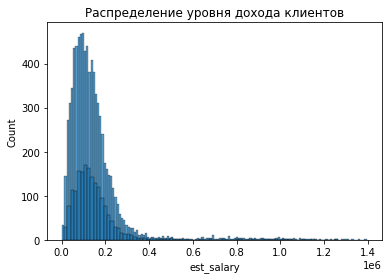

In [65]:
sns.histplot(data[data['churn'] == 0]['est_salary'])
sns.histplot(data[data['churn'] == 1]['est_salary'])
plt.title('Распределение уровня дохода клиентов')
plt.show()

Вывод:

1. Дисперсии не равны.
2. Распределение значений не является нормальным;
3. Генеральные совокупности не зависят друг от друга;

При отсутствии нормального распределения сравниваемых выборок вместо t-критерия Стьюдента используются аналогичные методы непараметрической статистики, среди которых наиболее известными является U-критерий Манна — Уитни.

In [66]:
# проведем u-test

alpha = 0.05  

results = st.mannwhitneyu(a, b)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


Вывод:

В данном случае, распределение не является нормальным, поэтому был выбран непараметрический тест U-критерий Манна — Уитни.

Таким образом, отвергаем нулевую гипотезу, доходы оставшихся и отточных клиентов не равны

Гипотеза №2: о различия score между теми клиентами, которые ушли и теми, которые остались.

H_0: кредитный рейтинг между оставшимися и ушедними пользователями равен;

H_1: кредитный рейтинг между оставшимися и ушедними пользователями отличается.

Так же проверим на нормальность

In [67]:
c = data[data['churn'] == 1]['score']
d = data[data['churn'] == 0]['score']

In [68]:
# оценим дисперсии
print(data[data['churn'] == 0]['score'].var())
print(data[data['churn'] == 1]['score'].var())

4623.062654176869
2458.2453747851396


In [69]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(c)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  9.341003897134215e-05
Распределение не нормально


In [70]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(c)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  9.341003897134215e-05
Распределение не нормально


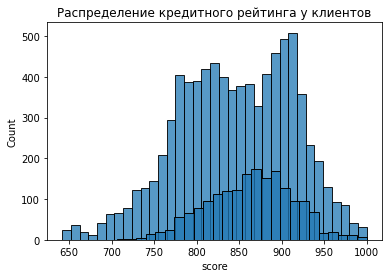

In [71]:
sns.histplot(data[data['churn'] == 0]['score'])
sns.histplot(data[data['churn'] == 1]['score'])
plt.title('Распределение кредитного рейтинга у клиентов')
plt.show();

Вывод:

1. Дисперсии не равны.
2. Распределение значений не является нормальным;
3. Генеральные совокупности не зависят друг от друга;

При отсутствии нормального распределения сравниваемых выборок вместо t-критерия Стьюдента используются аналогичные методы непараметрической статистики, среди которых наиболее известными является U-критерий Манна — Уитни.

In [72]:
# проведем u-test

alpha = 0.05  

results = st.mannwhitneyu(c, d)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  4.508763537702903e-22
Отвергаем нулевую гипотезу


Вывод:

В данном случае, распределение не является нормальным, поэтому был выбран непараметрический тест U-критерий Манна — Уитни.

Таким образом, отвергаем нулевую гипотезу о равестве score ушедших и оставшихся. Получается, уходящие пользователи становятся менее заинтересованными и их активнсть немного падает

Вывод по гипотезам:

1. Доходы отточных и неотточных клиентов не равны;
2. Кредитный рейтинг отточных и неотточных клиентов отличается.


## Шаг. Подведение промежуточных итогов - выводы по результатам EDA, корреляционного анализа и гипотез.

Признаки которые получились на основе анализа графиков:

- баллы кредитного рейтинга score от 800 до 905
- баланс balance от 250 000 до 900 000
- оценочный доход клиента est_salary от 100 000 до 200 000
- возраст age от 25 до 35 или от 50 до 60
- баллов собственности equity начиная от 3 и выше
- продуктов products от 3 и выше
- пол gender мужчина
- кредитной карты credit_card отсутсвие карты у клиегта
- активен last_activity больше активынх 

В ходе проверки гипотез был отброшен признак кредитного рейтинга.

Был подтверждён признак зависимости оттока от дохода.


По графику распределению оттока по возрасту, можно заметить две группы отточных клиентов:
1. 25-35 лет
2. 50-60 лет
очень удобно будет разбить по этому признаку выделить 2 сегмента,а третим сделать сегмент не зависящий от возраста.

## Шаг. Сегментация пользователей по потреблению.

Построим карту корреляции чтобы проанализировать зависимости между категориями и возможно или совсем отбросить излишние характеристики при сильной корреляци, или учесть что ин стоит разнести по разным сегментам в случает наличия умеренной корреляции

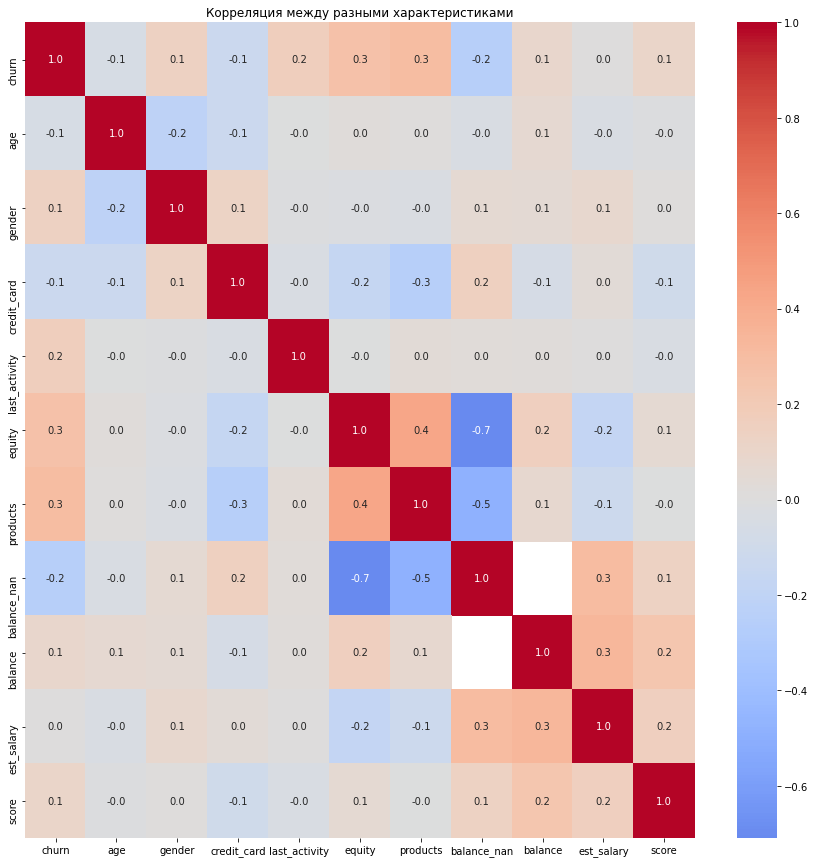

In [73]:
cor = data[['churn',
            'age',
            'gender',
            'credit_card',
            'last_activity',
            'equity',
            'products',
            'balance_nan',
            'balance',
            'est_salary',
            'score'
           ]].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, center=0, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Корреляция между разными характеристиками')
plt.show()

Корреляция оттока с характеристиками можно оценить как:
слабая - age, credit_card, last_activity, balance_nan, balance, est_salary, score. умеренная - gender, equity, products.

Можно заметить умеренную корреляцию между balance, est_salary и score. Поэтому лучше стараться выносить эти признаки в разные сегменты, чтобы максимизировать покрытие.

Сегмент №1

- Пол: мужской
- Возраст: 25 - 35
- Скоринговый рейтинг: от 800 до 905

In [74]:
display(data.query('gender==1 and 25 < age <= 35 and 800 <= score <= 905').agg({'churn':['mean','count']}))

,churn
mean,0.31069
count,898.00000


- Количество клиентов: 898
- Уровень отточности: 31%



Сегмент №2

- Пользовательская активность: да
- Возраст: 25-35
- баланс: от 250 000 до 900 000

In [75]:
display(data.query('last_activity == 1 and 25 <= age <= 35 and 250000 <= balance <= 900000').agg({'churn':['mean','count']}))

,churn
mean,0.396707
count,668.000000


- Количество клиентов: 668
- Уровень отточности: 39%


Сегмент №3 
- Оценка объектов собственности: 3 и выше
- Оценночный доход: от 100 000 до 200 000
- Наличие кредитной карты: нет

In [76]:
display(data.query('equity >= 3 and 100000 <= est_salary <= 200000 and credit_card == 0').agg({'churn':['mean','count']}))

,churn
mean,0.374589
count,913.000000


- Количество клиентов: 913
- Уровень отточности: 37%

Мы выделили три основных сегмента по оттоку клиентов

## Шаг. Приоритизация сегментов

Расположим сегменты в порядке убывания доли отточных клиентов: где процент оттока выше среднего по банку (он состовлял 18%)

1. Наиболее высокая доля отточных клиентов в сегменте №2 - почти 40% отточных клиентов
- Пользовательская активность: да
- Возраст: 25-35
- баланс: от 250 000 до 900 000

2. За ним следует сегмент №3 - более 37% ушедших клиентов
- Оценка объектов собственности: 3 и выше
- Оценночный доход: от 100 000 до 200 000
- Наличие кредитной карты: нет

3. На последней строке находится сегмент №1 - более 31% отточных клиентов
- Пол: мужской
- Возраст: 25 - 35
- Скоринговый рейтинг: от 800 до 905

## Шаг.  Выводы и формирование рекомендаций

Итоговые выводы
1. Проведена предобработка данных:

- переименованы столбцы USERID и EST_SALARY;
- изменен тип данных в столбце с float на int;
- полных дубликатов не обнаружено;
- проанализированы дубликаты дубликаты в столбце user_id;
- столбцах gender и city применена кодировка данных для удобства дальнейший расчетов;
- пропуски в столбце age были удалины, пропуски в столбце balance оставлены без изменений. Есть вероятность взаимосвязий баланса и оценночного дохода. 

2.  Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами практичеки нет корреляции, тогда как другие параметры практически не влияют на отток по шкале Чеддока корреляция слабая или умеренная.

К параметрам, влияющим на отток, относятся:

- баллы кредитного рейтинга score от 800 до 905
- баланс balance от 250 000 до 900 000
- оценочный доход клиента est_salary от 100 000 до 200 000
- возраст age от 25 до 35 или от 50 до 60
- баллов собственности equity начиная от 3 и выше
- продуктов products от 2 и выше
- пол gender мужчина
- кредитной карты credit_card отсутсвие карты у клиегта
- активен last_activity больше активынх 

3. Был проведен статистический анализ следующих гипотез:
- Проверили гипотезу о различии дохода между клиентами, которые ушли и которые остались
- Проверили гипотезу o различия score между теми клиентами, которые ушли и теми, которые остались
    
4. Были выделены и приоритизированы сегменты, в наибольшей степени подверженных оттоку (от 31 до 39% отточных клиентов)

Рекомендации для отдела маркетинга.


Для улучшения качества обслуживания каждого из выделенных высокоотточных сегментов можно выделить следующие рекомендации:

1. Сегмент №2 - более 39% отточных клиентов
- Пользовательская активность: да
- Возраст: 25-35
- баланс: от 250 000 до 900 000


Рекомендации:
- предложить оформить кредитную карту;
- информировать о новых доступных банковских продуктах;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк.

2. Сегмент №3 - более 37% ушедших клиентов
- Оценка объектов собственности: 3 и выше
- Оценночный доход: от 100 000 до 200 000
- Наличие кредитной карты: нет

Рекомендации:
- предложить оформить кредитную карту;
- предложить специальные условия по страхованию объектов собственности;
- информировать о новых доступных банковских продуктах;

3. Сегмент №1 - более 31% отточных клиентов
- Пол: мужской
- Возраст: 25 - 35
- Скоринговый рейтинг: от 800 до 905

Рекомендации: 
- предложить повышенный кешбек на товары для спорта, активного отдыха и рыбалки.
- предложить оформить ипотеку;
- для клиентов, получающих зарплату на карту другого банка - предложить льготные условия для перевода зарплаты в наш банк;